In [3]:
#matplotlib inline

# Spatial filtering

## using numerical python

In [4]:
import numpy as np

a = [1]
b = np.pad(a,(3,3),'constant', constant_values=(0, 0))
print(b)


[0 0 0 1 0 0 0]


In [5]:
a = [[1]]
b = np.pad(a,(2,2),'constant', constant_values=(0, 0))
print(b)

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 1 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]]


In [6]:
from scipy import ndimage

w = np.ones([3,3])/9
print('w = ',w)

b = np.zeros((8,8),dtype=np.uint8)
b[3:8,3:8] = 9
print('b = ', b)

r = ndimage.convolve(b,w, mode='constant', cval=0.0)
print('r = ',r)

w =  [[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]
b =  [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 0 9 9 9 9 9]
 [0 0 0 9 9 9 9 9]
 [0 0 0 9 9 9 9 9]
 [0 0 0 9 9 9 9 9]
 [0 0 0 9 9 9 9 9]]
r =  [[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 2 3 3 3 2]
 [0 0 2 4 6 6 6 4]
 [0 0 3 6 9 9 9 6]
 [0 0 3 6 9 9 9 6]
 [0 0 3 6 9 9 9 6]
 [0 0 2 4 6 6 6 4]]


In [7]:
r = ndimage.convolve(b,w, mode='reflect')
print(r)

[[0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0]
 [0 0 1 2 3 3 3 3]
 [0 0 2 4 6 6 6 6]
 [0 0 3 6 9 9 9 9]
 [0 0 3 6 9 9 9 9]
 [0 0 3 6 9 9 9 9]
 [0 0 3 6 9 9 9 9]]


### Convolution with 9 by 9 smoothing filter

size of grayIm is:  (512, 512)


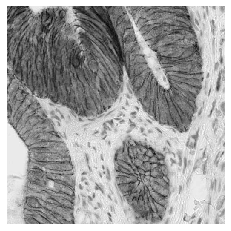

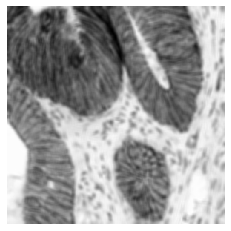

In [8]:
from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=data.immunohistochemistry()

grayIm = rgb2gray(im)

print('size of grayIm is: ',grayIm.shape)
figWidth,figHeight=grayIm.shape

plt.imshow(grayIm,cmap='gray')
plt.axis('off')
plt.show()

w = np.ones([9,9])/81
blur = ndimage.convolve(grayIm,w, mode='reflect')

plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()

### Correlation with 9 by 9 smoothing filter

Same result produced by convolution or correlation since the filter is symmetric.

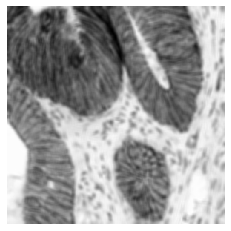

In [9]:

w = np.ones([9,9])/81
blur = ndimage.correlate(grayIm,w, mode='reflect')

plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()



## Create simple image composed of two gray levels, and add Gaussian noise.


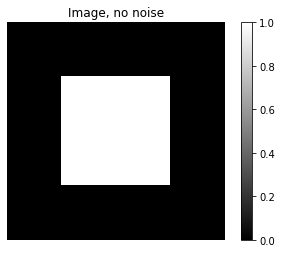

n=[[ 0.04293307  1.19992296  0.08511479]
 [-0.57356923  0.44285138  0.10777344]
 [-0.95167637 -0.65034113 -1.9145336 ]]

 Min value of I is -2.292724952774021


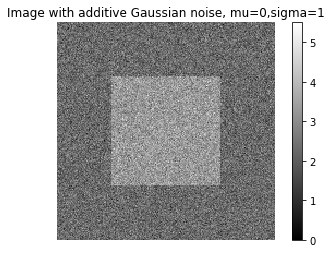

In [56]:
import cv2
# Create image with two gray levels, corrupted by Gaussian (normally distributed) noise.
I = np.zeros([200,200],dtype='uint8')
I[50:150,50:150]= 1

plt.imshow(I,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Image, no noise')
plt.show()

# Add Gaussian noise, mu=0, sigma=1.
mu = 0
sigma = 1
#print example array of Gaussian noise
n = np.random.normal(mu, sigma, [3,3])
print(f'n={n}')

n = np.random.normal(mu, sigma, [200,200])
I = I + 0.5*n

print(f'\n Min value of I is {I.min()}')

# we don't want negative graylevels
I = I - I.min()

plt.imshow(I,cmap='gray')
plt.axis('off')
plt.colorbar()
plt.title('Image with additive Gaussian noise, mu=0,sigma=1')
plt.show()

### First using 3x3 moving average filter

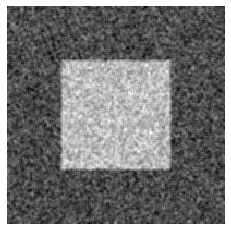

In [11]:
w = np.ones([3,3])/9
blur = ndimage.correlate(I,w, mode='reflect')

plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()

### Filter with 15x15 moving average filter

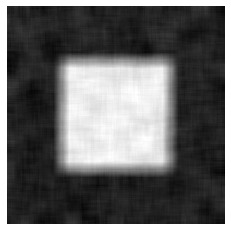

In [12]:
w = np.ones([15,15])/225
blur = ndimage.correlate(I,w, mode='reflect')

plt.imshow(blur,cmap='gray')
plt.axis('off')
plt.show()

## Filter with Lee adaptive filters 
### (filters strongly away from edges, less at edge)

In [42]:
#Implementation of Lee adaptive filter from Alex I
#https://stackoverflow.com/questions/39785970/speckle-lee-filter-in-python

from scipy.ndimage.filters import uniform_filter
from scipy.ndimage.measurements import variance

def lee_filter(img, size):
    img_mean = uniform_filter(img, (size, size))
    img_sqr_mean = uniform_filter(img**2, (size, size))
    img_variance = img_sqr_mean - img_mean**2

    overall_variance = variance(img)

    img_weights = img_variance / (img_variance + overall_variance)
    img_output = img_mean + img_weights * (img - img_mean)
    return img_output

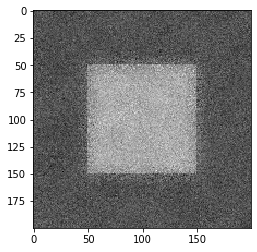

In [43]:
plt.imshow(I,  cmap='gray')
plt.imshow(lee_filter(I, 20),  cmap='gray')

## Filter with bilateral filter

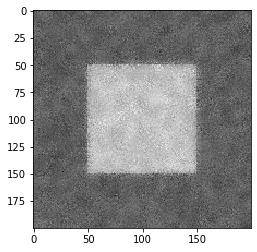

In [44]:
import cv2 
    
    
#For function bilateralFiltering, image must by float64 or uint8:
#convert I to img
data = I.astype(np.float64) 
data = data/ data.max() # normalize the data to 0 - 1
data = 255 * data # Now scale by 255
img = data.astype(np.uint8)
    
# Apply bilateral filter with d = 15,  
# sigmaColor = sigmaSpace = 75. 
bilateral = cv2.bilateralFilter(img, 12, 40, 40) 
  
# Save the output. 
cv2.imwrite('Im.jpg', bilateral) 

plt.imshow(bilateral,  cmap='gray')
plt.show()

### Comment:  In my analysis, the bilateral filter has the best result for reducing noise, 
but there seems to be patches of weaker / stronger noise in the texture of the light square.
Notice that the Lee filter produces a lighter border in the dark pixels, surrounding the
light central square, which is not apparent in the bilateral filter results.
Both bilateral and Lee filters avoid the stark artefacts created by the moving average
filtering.

## Gaussian low pass filter

In [45]:
# Create 3x3 Gaussian low pass filter with sigma = 0.5.
sigma = 0.5
w = np.zeros([3 ,3],dtype='double')
for x in range(-1,2):
  for y in range(-1,2):
    w[ x + 1, y + 1] = np.exp( -(x**2 + y**2) / (2*sigma**2) )
w = w / w.sum()    
print(w)

[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


In [46]:
# Create 1D Gaussian kernel of size 3 and sigma = 0.5
import cv2
kernel_1D = cv2.getGaussianKernel(3,0.5)
print(kernel_1D)

# Create 2D Guassian kernel by vector multiplication
kernel_2D = kernel_1D*kernel_1D.transpose()
print(kernel_2D)

[[0.10650698]
 [0.78698604]
 [0.10650698]]
[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


### Gaussian filtering with opencv

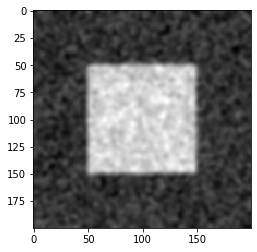

In [47]:
c = cv2.GaussianBlur(I,(9,9),2)
plt.imshow(c,cmap='gray')

## 1D signal, and its first and second derivatives

[ 0  0  0 -1 -1 -1 -1 -1  0  0  0  0  0  5  0  0  0  0  0  0  0]
[ 0  0  0 -1  0  0  0  0  1  0  0  0  0  5 -5  0  0  0  0  0  0]


Text(0.5, 1.0, 'Second derivative')

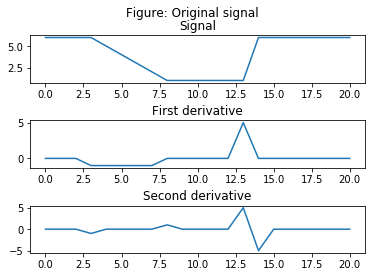

In [48]:
y = [6,6,6,6,5,4,3,2,1,1,1,1,1,1,6,6,6,6,6,6,6]
y1 = ndimage.convolve(y, [1,-1], mode='reflect')
y2 = ndimage.convolve(y, [1,-2,1], mode='reflect')

print(y1)
print(y2)

fig, axs = plt.subplots(3, gridspec_kw={'hspace': 0.8})
fig.suptitle('Figure: Original signal')
axs[0].plot(y)
axs[0].set_title('Signal')
axs[1].plot(y1)
axs[1].set_title('First derivative')
axs[2].plot(y2)
axs[2].set_title('Second derivative')

### What does the following matrix do when multiplied by our signal?  [A]x?

In [49]:
len = 21
A1 = np.diag(np.repeat(-2, len))
A2 = np.diag(np.repeat(1, len-1),k=1)
A3 = np.diag(np.repeat(1, len-1),k=-1)
A = A1+A2+A3
print(A)

[[-2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1 -2  1  0  0  0  0  0]
 [ 0  0  0

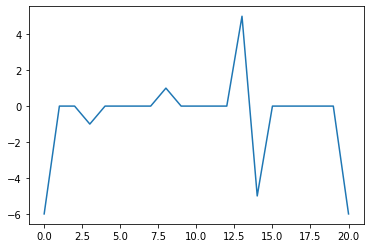

In [21]:
z = np.matmul(A,y)
plt.plot(z)
plt.show()

## Image derivatives (2D)

wx =  [[-1  1]]
wy =  [[-1]
 [ 1]]


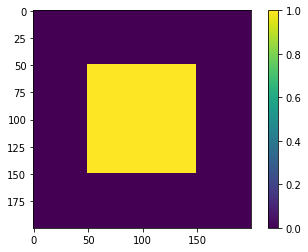

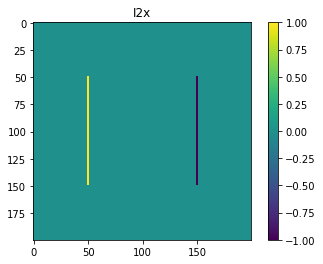

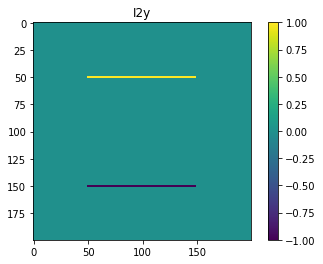

In [22]:
wx = ( [[ -1 , 1 ]] ) #list object
wx = np.array([[-1,1]]) #np array
wy=wx.transpose() # ust be np array-  does not work with list object.
print('wx = ', wx)
print('wy = ', wy)
I = np.zeros([200,200],dtype='int8')
I[50:150,50:150]= 1
plt.imshow(I)
plt.colorbar()
plt.show()

I2x = ndimage.correlate(I,wx, mode='reflect')
plt.imshow(I2x)
plt.colorbar()
plt.title('I2x')
plt.show()

I2y = ndimage.correlate(I,wy, mode='reflect')
plt.imshow(I2y)
plt.colorbar()
plt.title('I2y')
plt.show()




### Image derivatives with Sobel kernel

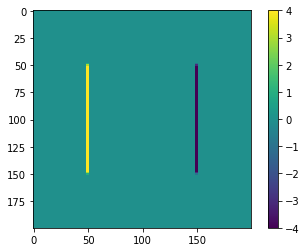

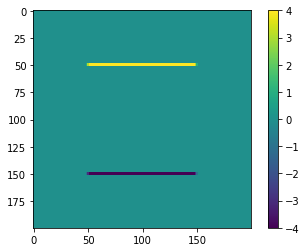

In [23]:
Isobx = ndimage.sobel(I, axis=1) #vertical
plt.imshow(Isobx)
plt.colorbar()
plt.show()

Isoby = ndimage.sobel(I, axis=0) #horizontal
plt.imshow(Isoby)
plt.colorbar()
plt.show()

## Apply Sobel 
- use coins and immunohistochemistry images
- convert image to signed 16 bit to allow negative values of derivatives (i.e. +/- 8 bit) 

After image load: im of datatype uint8
After int16 command: im of datatype int16
But max value of im is 252 and min 1


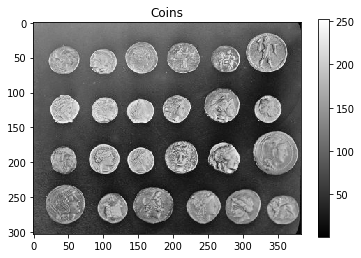

In [69]:

from skimage import data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray

im=data.coins()
print(f'After image load: im of datatype {im.dtype}' )
im= np.int16(im)
print(f'After int16 command: im of datatype {im.dtype}' )
print(f'But max value of im is {np.max(im)} and min {np.min(im)}')


plt.imshow(im,cmap='gray')
plt.colorbar()
plt.title('Coins')
plt.show()



### Now apply sobel operator in x and y separately

Isobx of datatype int16


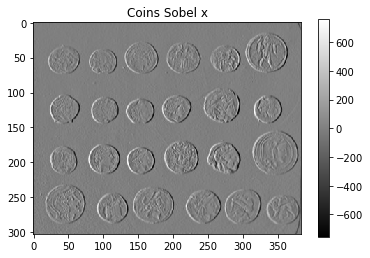

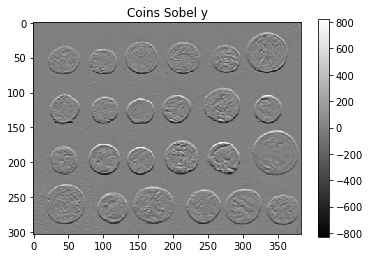

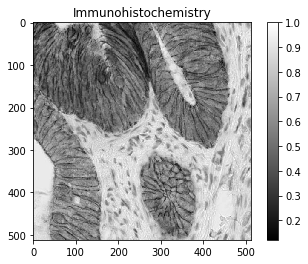

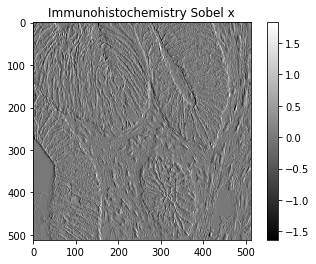

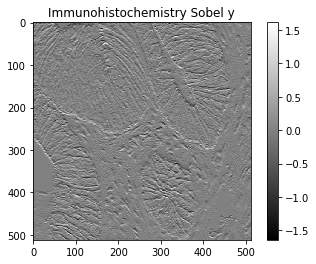

In [70]:
Isobx = ndimage.sobel(im, axis=1) #vertical
print('Isobx of datatype',Isobx.dtype)
plt.imshow(Isobx,cmap='gray')
plt.title('Coins Sobel x')
plt.colorbar()
plt.show()

Isoby = ndimage.sobel(im, axis=0) #horizontal
plt.imshow(Isoby,cmap='gray')
plt.title('Coins Sobel y')
plt.colorbar()
plt.show()

im=data.immunohistochemistry()

gIm = rgb2gray(im)

# This time, don't convert to 16 bit image.
plt.imshow(gIm,cmap='gray')
plt.colorbar()
plt.title('Immunohistochemistry')
plt.show()


Isobx = ndimage.sobel(gIm, axis=1) #vertical
plt.imshow(Isobx,cmap='gray')
plt.colorbar()
plt.title('Immunohistochemistry Sobel x')
plt.show()

Isoby = ndimage.sobel(gIm, axis=0) #horizontal
plt.imshow(Isoby,cmap='gray')
plt.colorbar()
plt.title('Immunohistochemistry Sobel y')
plt.show()

## Gradient function in 2D: $\left( \dfrac{\partial I}{\partial x}, \dfrac{\partial I}{\partial y} \right)$

In [80]:
np.gradient(np.array([[1, 2, 6], [3, 4, 5]], dtype=float))

[array([[ 2.,  2., -1.],
        [ 2.,  2., -1.]]),
 array([[1. , 2.5, 4. ],
        [1. , 1. , 1. ]])]

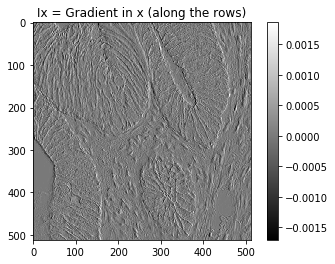

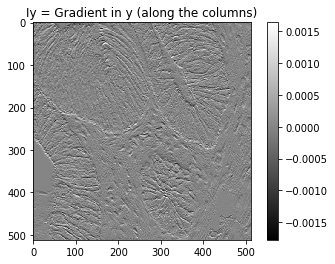

In [81]:
gIm = rgb2gray(im)
Iy,Ix = np.gradient(gIm)
plt.imshow(Ix,cmap='gray')
plt.colorbar()
plt.title('Ix = Gradient in x (along the rows)')
plt.show()

plt.imshow(Iy,cmap='gray')
plt.colorbar()
plt.title('Iy = Gradient in y (along the columns)')
plt.show()


## Laplacian

im of datatype uint8
im of datatype int16


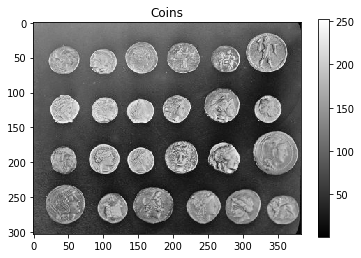

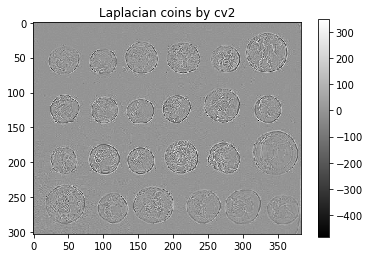

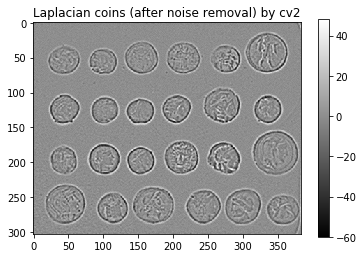

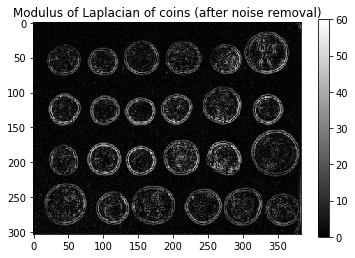

In [82]:

im=data.coins()
print('im of datatype',im.dtype)
im= np.int16(im)
print('im of datatype',im.dtype)
plt.imshow(im,cmap='gray')
plt.colorbar()
plt.title('Coins')
plt.show()

laplacian = cv2.Laplacian(im,cv2.CV_64F)
plt.imshow(laplacian,cmap='gray')
plt.colorbar()
plt.title('Laplacian coins by cv2')
plt.show()

im = cv2.GaussianBlur(im,(5,5),0) #remove noise
laplacian = cv2.Laplacian(im,cv2.CV_64F)
plt.imshow(laplacian,cmap='gray')
plt.colorbar()
plt.title('Laplacian coins (after noise removal) by cv2')
plt.show()

plt.imshow(abs(laplacian),cmap='gray')
plt.colorbar()
plt.title('Modulus of Laplacian of coins (after noise removal)')
plt.show()

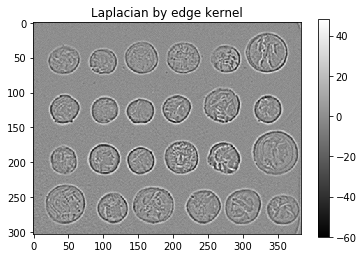

In [83]:
L = np.array([[0,1,0],
              [1,-4,1],
              [0,1,0]])
LapIm = ndimage.correlate(im,L, mode='reflect')

plt.imshow(LapIm, cmap='gray')
plt.colorbar()
plt.title('Laplacian by edge kernel')
plt.show()

## Segunda derivada

d2imdy2 = $\dfrac{\partial^2 I}{\partial y^2}$,

d2imdx2 = $\dfrac{\partial^2 I}{\partial x^2}$

$\nabla^2 I = \dfrac{\partial^2 I}{\partial x^2} + \dfrac{\partial^2 I}{\partial y^2}$ for a bidimensional image, $I(x,y)$.

In [87]:
from scipy import ndimage
I = np.zeros([7,8])
I[3:,3:]=1.0
print(f'Image is: {I}')
        


Image is: [[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1.]
 [0. 0. 0. 1. 1. 1. 1. 1.]]


## Show result is the same using convolve with sobel or function

Sobel x derivate kernel: {Sob}
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 3. 3. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]]


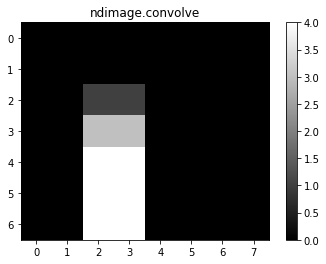

[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 3. 3. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]]


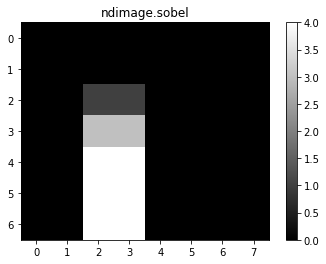

In [88]:
# Define sobel(x) kernel        
Sob = np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print('Sobel x derivate kernel: {Sob}')
        
# Apply sobel in x, using convolution and reflect at boundaries.        
Isobx = ndimage.convolve(I,Sob,mode='reflect')
print(Isobx)
plt.imshow(Isobx,cmap='gray')
plt.title('ndimage.convolve')
plt.colorbar()
plt.show()


[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 3. 3. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]
 [0. 0. 4. 4. 0. 0. 0. 0.]]


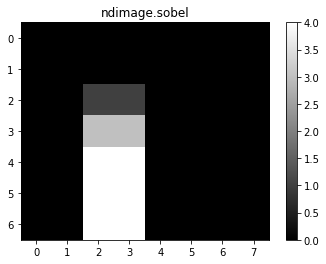

In [89]:

# Use sobel function from ndimage along x axis (axis = 1)
Isobx2 = ndimage.sobel(I, axis=1) 
print(Isobx2)
plt.imshow(Isobx2,cmap='gray')
plt.title('ndimage.sobel')
plt.colorbar()
plt.show()

## Salt and Pepper noise

In [90]:

# from https://inneka.com/programming/python/
#  how-to-add-noise-gaussian-salt-and-pepper-etc-to-image-in-python-with-opencv-duplicate/
import numpy as np
import os
import cv2
def spnoise(image):
      height = image.shape[0]
      width = image.shape[1]
      print(height,width)
      s_vs_p = 0.5
      amount = 0.004 #Alter the number of "noise pixels"
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1
      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out

60 50


/home/jasus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/home/jasus/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


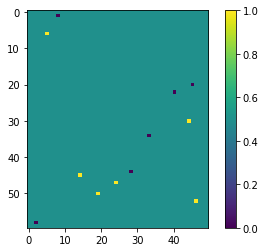

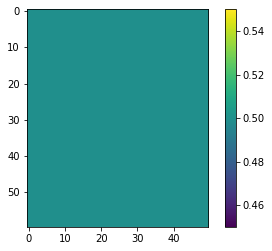

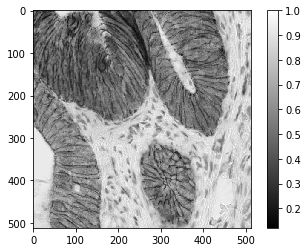

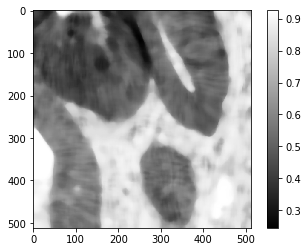

In [92]:
I = 0.5*np.ones([60,50])

I2=spnoise(I)

plt.imshow(I2)
plt.colorbar()
plt.show()

from scipy import ndimage, misc
import matplotlib.pyplot as plt
medI2 = ndimage.median_filter(I2, size=20)
plt.imshow(medI2)
plt.colorbar()
plt.show()


im=data.immunohistochemistry()
Immuno = rgb2gray(im)
plt.imshow(Immuno,cmap='gray')
plt.colorbar()
plt.show()

medImmuno = ndimage.median_filter(Immuno,size=20)
plt.imshow(medImmuno,cmap='gray')
plt.colorbar()
plt.show()

## Plot subregions of the images. 

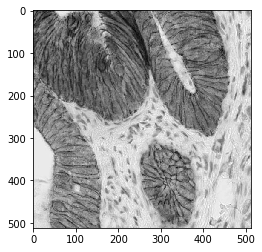

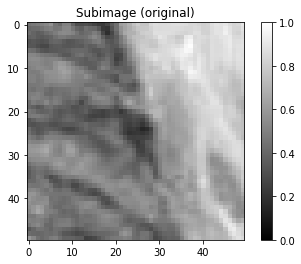

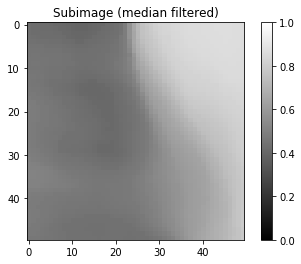

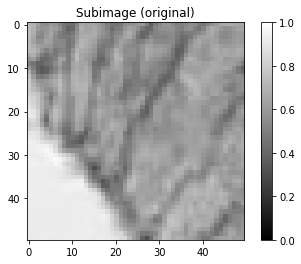

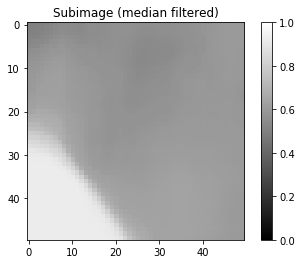

In [100]:
import matplotlib.patches as patches

fig,ax = plt.subplots(1)
ax.imshow(Immuno,cmap='gray')
plt.show()

# clim=(0, 1) set color limits to between 0 and 1.
# We want to have each image at the same grayscale limits.
plt.imshow(Immuno[0:50,400:450],cmap='gray', clim=(0, 1))
plt.colorbar()
plt.title('Subimage (original)')
plt.show()

plt.imshow(medImmuno[0:50,400:450],cmap='gray', clim=(0, 1))
plt.colorbar()
plt.title('Subimage (median filtered)')
plt.show()

plt.imshow(Immuno[250:300,0:50],cmap='gray', clim=(0, 1))
plt.colorbar()
plt.title('Subimage (original)')
plt.show()

plt.imshow(medImmuno[250:300,0:50],cmap='gray', clim=(0, 1))
plt.colorbar()
plt.title('Subimage (median filtered)')
plt.show()

In [108]:
v = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(f'v={v}')

v=[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [115]:
print(ndimage.convolve(v,v))

[[ 75 102 135]
 [138 165 198]
 [255 282 315]]


In [116]:
print(ndimage.correlate(v,v))

[[135 168 195]
 [252 285 312]
 [315 348 375]]
